# Ομάδα 

Στοιχεία Μέλους 1: Σκουρτσή Δήμητρα-Άννα: el18044

Στοιχεία Μέλους 2: Στεργιόπουλος Ανστάσιος: el18605

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      total = len(y_pred)
      acc= 0
      for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
          acc += 1
      acc = acc/total
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0, 0, 1]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.7
recall: 0.7083333333333333
f1: 0.6969696969696968
accuracy: 0.7
Confusion matrix: 
[[3 1]
 [2 4]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/My Drive/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

#κρατάμε μόνο τα χαρακτηριστικά που μας ενδιαφέρουν
selected = inputs + [output]
data = data[selected]
print(data.head())

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

labels = data[output]
features = data.iloc[:,0:6]

#εφαρμόζουμε το dictionary genres_to_id στο dataset μας 
new_labels = []
for label in labels:
  label = genres_to_id[label]
  new_labels.append(label)
labels = pd.DataFrame(new_labels)

from sklearn.model_selection import train_test_split
# διαχωρισμός dataset σε train και test
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
## Your code above
##################

   acousticness  danceability  energy  instrumentalness  liveness  \
0       0.00468         0.652   0.941           0.79200     0.115   
1       0.01270         0.622   0.890           0.95000     0.124   
2       0.00306         0.620   0.755           0.01180     0.534   
3       0.02540         0.774   0.700           0.00253     0.157   
4       0.00465         0.638   0.587           0.90900     0.157   

   speechiness music_genre  
0       0.0748  Electronic  
1       0.0300  Electronic  
2       0.0345  Electronic  
3       0.2390  Electronic  
4       0.0413  Electronic  


## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below
print("original dataset shape", data.shape, "\n")
print("x_train, y_train shapes", x_train.shape, y_train.shape, "\n")
print("x_test, y_test", x_test.shape, y_test.shape, "\n")
## Your code above
##################

original dataset shape (13531, 7) 

x_train, y_train shapes (9471, 6) (9471, 1) 

x_test, y_test (4060, 6) (4060, 1) 



###<center> Σχολιασμος </center> </Br>
Όπως φαίνεται από τις παραπάνω μορφές των train και test set μας, έχει γίνει σωστά ο διαχωρισμός 70% train - 30% test του αρχικού μας dataset. (13531 αρχικά δεδομένα, 9471 (=13531×0.7) train, 4060 (=13531×0.3) test. Τα x_train, x_test περιλαμβάνουν τα 6 χαρακτριστικά, ενώ τα y_train, y_test περιλαμβάνουν την κατηγορία στην οποία ανήκει κάθε τραγούδι (row).


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of x_train, x_test columns

##################
## Your code below
pd.set_option('display.max_rows', None, "display.max_columns", None)
print("Min and Max for x_train")
print(x_train.describe().loc[['min','max']])
print("Min and Max for x_test")
print(x_test.describe().loc[['min','max']])

x_train = x_train.to_numpy()
y_train = y_train.to_numpy().ravel()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().ravel()
## Your code above
##################

Min and Max for x_train
     acousticness  danceability   energy  instrumentalness  liveness  \
min      0.000001        0.0964  0.00259             0.000    0.0173   
max      0.994000        0.9770  0.99900             0.986    0.9910   

     speechiness  
min       0.0224  
max       0.9220  
Min and Max for x_test
     acousticness  danceability  energy  instrumentalness  liveness  \
min      0.000003        0.0645  0.0346             0.000    0.0221   
max      0.987000        0.9750  0.9980             0.974    0.9790   

     speechiness  
min       0.0228  
max       0.8280  


Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

###<center> Σχολιασμος </center> </Br>
Παρατηρούμε ότι οι τιμές των χαρακτηριστικών βρίσκονται στο εύρος [0,1], και έχουν περίπου το ίδιο εύρος. Επίσης παρατηρούμε πολύ κοντινά μέγιστα και ελάχιστα για τα χαρακτηριστικά για το train και το test που δείχνει ότι ο διαχωρισμός του αρχικού dataset είναι επιτυχής και αντιπροσωπευτικός. Οι ταξινομητές knn και MLP δεν απαιτούν τα δεδομένα να είναι μεταξύ [0,1]. Αντιθέτως ο ταξινομητής GNB γνωρσίζουμε πως θέλει οι τιμές κάθε χαρακτηριστικού να είναι είτε 0 είτε 1. Το γεγονός ότι όλες οι τιμές κυμαίνονται στο [0,1] θα μας βοηθήσει να μετατρέψουμε αργότερα τα δεδομένα μας από συνεχείς τιμές σε διακριτές με τιμή είτε 1 είτε 0. 

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
from numpy import linalg as LA
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      dist = 0
      if self.distance=='euclidian':
        ##################
        ## Your code below
        for i in range(6):
          dist += (row1[i]-row2[i])**2
        dist =  np.sqrt(dist)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - np.dot(row1, row2)/(LA.norm(row1)*LA.norm(row2))
        ## Your code above
        ##################
        pass
      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      for neighbour in x:
        dist = self.get_distance(row, neighbour)
        distances.append(dist)
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    #συνάρτηση που υπολογίζει την πιο συχνή κλάση
    def most_frequent(self, L):
      count = 0
      most_frequent = L[0]
      for l in L:
          current_freq = L.count(l)
          if(current_freq > count):
              count = current_freq
              most_frequent = l
      return most_frequent

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      ##################
      ## Your code below
      prediction = self.most_frequent(nn_labels)
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train, k=5, distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.6606691919191919
recall: 0.6513811642565813
f1: 0.6536388140161725
accuracy: 0.66
Confusion matrix: 
[[16  8  5]
 [ 5 29  6]
 [ 3  7 21]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.5964545637866872
recall: 0.5989618094178716
f1: 0.5973695844385499
accuracy: 0.6
Confusion matrix: 
[[16  7  6]
 [ 9 24  7]
 [ 4  7 20]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

In [ ]:
for k in [3, 5, 10, 20]:
  print("\nk =",k)
  knn = KNN(x_train, y_train, k, distance='cosine')
  labels = [y_test[i] for i in range(100)]
  eval = Evaluate(labels, preds)
  print("\nour knn with cosine\n")
  eval.get_evaluation_report()

  knn = KNN(x_train, y_train, k, distance='euclidian')
  labels = [y_test[i] for i in range(100)]
  eval = Evaluate(labels, preds)
  print("\nour knn with euclidian\n")
  eval.get_evaluation_report()

  knc = KNeighborsClassifier(n_neighbors = k)
  knc.fit(x_train, y_train)
  y_pred = knc.predict(x_test[:100])
  eval = Evaluate(y_test[:100], y_pred)
  print("\nsklearn knn\n")
  eval.get_evaluation_report()




k = 3

our knn with cosine

precision: 0.6606691919191919
recall: 0.6513811642565813
f1: 0.6536388140161725
accuracy: 0.66
Confusion matrix: 
[[16  8  5]
 [ 5 29  6]
 [ 3  7 21]]

our knn with euclidian

precision: 0.6606691919191919
recall: 0.6513811642565813
f1: 0.6536388140161725
accuracy: 0.66
Confusion matrix: 
[[16  8  5]
 [ 5 29  6]
 [ 3  7 21]]

sklearn knn

precision: 0.5964545637866872
recall: 0.5989618094178716
f1: 0.5973695844385499
accuracy: 0.6
Confusion matrix: 
[[16  7  6]
 [ 9 24  7]
 [ 4  7 20]]

k = 5

our knn with cosine

precision: 0.6606691919191919
recall: 0.6513811642565813
f1: 0.6536388140161725
accuracy: 0.66
Confusion matrix: 
[[16  8  5]
 [ 5 29  6]
 [ 3  7 21]]

our knn with euclidian

precision: 0.6606691919191919
recall: 0.6513811642565813
f1: 0.6536388140161725
accuracy: 0.66
Confusion matrix: 
[[16  8  5]
 [ 5 29  6]
 [ 3  7 21]]

sklearn knn

precision: 0.6401163847972359
recall: 0.6274564330737857
f1: 0.6307210031347963
accuracy: 0.64
Confusion matri

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 612 ms


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 720 ms, sys: 5.35 ms, total: 726 ms
Wall time: 738 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 15.7 ms, sys: 185 µs, total: 15.9 ms
Wall time: 16.5 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 585 ms, sys: 0 ns, total: 585 ms
Wall time: 585 ms


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 719 ms, sys: 3.74 ms, total: 723 ms
Wall time: 726 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 20.6 ms


##<center> Σχολιασμός </center>
Παρατηρούμε ότι η δική μας υλοποίση σε σχέση με την υλοποίηση του sklearn έχει μικροαποκλίσεις. Με δοκιμές καταλάβαμε ότι αυτές οι διαφορές οφείλονται στο γεγονός ότι όταν έχουν ισοψηφία μεταξύ δυο κλάσεων άλλη κλάση διαλέγουμε εμείς και άλλη ο έτοιμος knn. </br>
Κοιτώντας τους χρόνους εκτέλεσης των δύο Knn παρατηρούμε ότι ο έτοιμος knn είναι αισθητά πιο γρήγορος. Αυτό οφείλεται στην πιο αποδοτική υλοποίησή του.



# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]
        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        count = np.zeros(len(genres))                     #Μετράμε πόσες φορές το χαρακτηριστικό i είναι 1 όταν το τραούδι ανήκει στην κλάση 0, 1 ή 2 αντίστοιχα
        for num in range(self.x.shape[0]):
          count[self.y[num]] += 1
          for i in range(self.x.shape[-1]):
            self.pxC[i][self.y[num]] += self.x[num][i]
        self.pxC += 40*0.5                               #Για να μην έχουν κάποια πιθανότητα ίση με 0 (προσθέτουμε 40 νέα δείγματα)                     
          
        for i in range(self.x.shape[-1]):                #Διαιρούμε με το πλήθος των τραγουδιών που ανήκουν σε κάθε κλάση + 40 (από την απαίτηση να μην έχουμε 0)
          for genre in range(len(genres)):
            self.pxC[i][genre] /= (count[genre] + 40)   
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
          pcX[i] *= self.pC[i]
          for j in range(xsize):
            if(x[j] == 1):
              pcX[i] *= self.pxC[j][i]
            else:
              pcX[i] *= (1 - self.pxC[j][i])     
          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.6637182799973497
recall: 0.6432424916573971
f1: 0.6393598710953236
accuracy: 0.65
Confusion matrix: 
[[13 10  6]
 [ 5 27  8]
 [ 0  6 25]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.670976900245193
recall: 0.6420930663700408
f1: 0.6296574960733649
accuracy: 0.66
Confusion matrix: 
[[10  9 10]
 [ 3 31  6]
 [ 1  5 25]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 411 ms, sys: 1.46 ms, total: 413 ms
Wall time: 415 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 4.75 ms, sys: 0 ns, total: 4.75 ms
Wall time: 7.4 ms


##<center> Σχολιασμός</center>
Παρατηρούμε ότι η ακρίβεια του δικού μας GNB και του έτοιμου GNB είναι πολύ κοντά, ένω και πάλι ο έτοιμος GNB είναι πολύ πιο γρήγορος λόγω της αποδοτικής του υλοποίησης.


# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot
        output = np.dot(input, self.weights) + self.biases
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            next_input = l.forward(input)
            input = next_input
            activations.append(next_input)
            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

def mlp_train(network, x_train, y_traiin, x_test, y_test, epochs):
  train_log = []
  val_log = []

  for epoch in range(epochs):
      network.fit(x_train, y_train)   
      train_log.append(np.mean(network.predict(x_train) == y_train))
      val_log.append(np.mean(network.predict(x_test) == y_test))
      clear_output()
      print("Epoch", epoch)
      print("Train accuracy:", train_log[-1])
      print("Val accuracy:", val_log[-1])  
      plt.plot(train_log,label = 'train accuracy')
      plt.plot(val_log,label = 'val accuracy')
      plt.legend(loc = 'best')
      plt.grid()
      plt.show()

  y_pred = network.predict(x_test)

  eval = Evaluate(y_test, y_pred)
  eval.get_evaluation_report()

Epoch 99
Train accuracy: 0.6532573117938971
Val accuracy: 0.6460591133004926


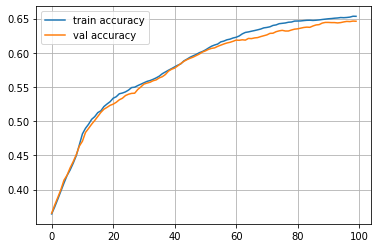

precision: 0.6760436256700956
recall: 0.6454065417128383
f1: 0.6440930780812274
accuracy: 0.6460591133004926
Confusion matrix: 
[[ 713  302  350]
 [ 115  830  371]
 [  21  278 1080]]
CPU times: user 26.1 s, sys: 12.5 s, total: 38.5 s
Wall time: 25.5 s


In [ ]:
%%time
mlp_train(network, x_train, y_train, x_test, y_test, 100)

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 100
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7454592951459443
recall: 0.7324084898552984
f1: 0.7320058668962736
accuracy: 0.7312807881773399
Confusion matrix: 
[[ 904  316  145]
 [ 144 1080   92]
 [  88  306  985]]
CPU times: user 3.53 s, sys: 99.4 ms, total: 3.63 s
Wall time: 3.55 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


Epoch 49
Train accuracy: 0.4969908140639848
Val accuracy: 0.4645320197044335


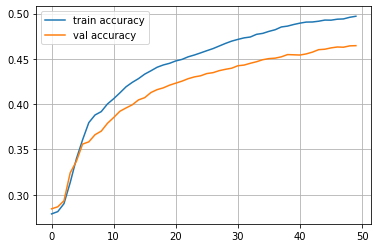

precision: 0.6850806600980222
recall: 0.4685305232502554
f1: 0.3833325768365503
accuracy: 0.4645320197044335
Confusion matrix: 
[[   8 1208  149]
 [   0 1091  225]
 [   0  592  787]]


In [ ]:
network = MLP([10, 150, 20, 3], len(inputs))
mlp_train(network, x_train, y_train, x_test, y_test, 50)

In [ ]:
epochs = 50
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7408842489081969
recall: 0.723114025214684
f1: 0.7212729125218212
accuracy: 0.7219211822660099
Confusion matrix: 
[[ 818  367  180]
 [ 120 1089  107]
 [  60  295 1024]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Epoch 149
Train accuracy: 0.6886284447260057
Val accuracy: 0.6775862068965517


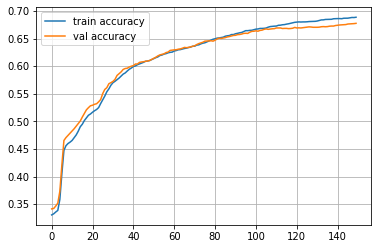

precision: 0.7011942143686708
recall: 0.6777015492697531
f1: 0.6753569392349932
accuracy: 0.6775862068965517
Confusion matrix: 
[[ 732  361  272]
 [ 124  943  249]
 [  20  283 1076]]


In [ ]:
network = MLP([10, 15, 20, 3], len(inputs))
mlp_train(network, x_train, y_train, x_test, y_test, 150)

In [ ]:
epochs = 150
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7549913945041027
recall: 0.7476075220216055
f1: 0.7470925618024978
accuracy: 0.7470443349753695
Confusion matrix: 
[[ 916  288  161]
 [ 144 1054  118]
 [  75  241 1063]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


##<center>Σχολιασμός</center>
Παρατηρούμε ότι το έτοιμο MLP έχει καλύτερα αποτελέσματα από το δικό μας και πιο γρήγορους χρόνους εκτέλεσης. Αυτό συμβαίνει γιατί το MPL που προσφέρει η sklearn εχει βελτιστοποιηθεί ως προς τον τρόπο εκπαίδευσης και την λειτουργία του.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



##<center>Σχολιασμός</center>
Παρακάτω βλέπουμε συγκεντρωμένα την ακρίβεια και τον χρόνο εκτέλεσης των 3 ταξινομητών.</br></br>
Knn δικός μας: για k=5 και distance = ευκλίδεια: ακρίβεια:0.66 χρόνος: 608ms </br>
Knn δικός μας: για k=5 και distance = cosine: ακρίβεια:0.66 χρόνος: 716ms </br>
Knn sklearn: για k=5 και distance = ευκλίδεια: ακρίβεια:0.6 χρόνος: 15.9ms </br>
GNB δικός μας: ακρίβεια:0.65 χρόνος: 413ms </br>
GNB sklearn: ακρίβεια:0.66 χρόνος: 4.75ms </br>
MLP δικός μας: ακρίβεια:0.65 χρόνος: 38.5ms για 100 εποχές</br>
MLP sklearn: ακρίβεια:0.73 χρόνος: 3.63ms για 100 εποχές</br>
</br>
Γενικά, στη μηχανική μάθηση για την βελτιστοποίηση κάθε ταξινομητή απαιτούνται πολλές δοκιμές και εφαρμογές διαφορετικών μεθόδων προεπεξεργασίας των δεδομένων (κανονικοποίση, over/under sampling, μειώση διαστατικότητας) και εύρεση της βέλτιστης τιμών των υπεροπαραμέτρων κάθε ταξινομητή. </br>
Στην συγκεκριμένη περίπτωση, χωρίς βελτιστοποιήσεις και προεπεξεργασία, παρατηρούμε ότι από τις δικές μας υλοποιήσεις την καλύτερη ακρίβεια έχει ο Knn για k=5, ενώ συνολικά την καλύτερη ακρίβεια έχει ο έτοιμος MLP αν και είναι πιο χρονοβόρος.